<a href="https://colab.research.google.com/github/VegaSera/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Wesley_Mountford_LS_DS12_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  post_prob = (true_positive_rate*prob_drunk_prior) / ((true_positive_rate*prob_drunk_prior) + (false_positive_rate*(1 - prob_drunk_prior)))
  return post_prob

In [2]:
prob_drunk = 0.001 #initial ratio of drunk drivers in the population.
for i in range(6):
  print(f'Chance of being drunk after {i} tests - {prob_drunk*100}%')
  prob_drunk = prob_drunk_given_positive(prob_drunk, 0.08, 1)

#Typically in criminal cases, you need to prove your case beyond a reasonable doubt, the rule of thumb of which is 99%, not 95%.
#Four positive tests is better than 95%, Five positive tests is enough for a DUI conviction.
#And below is the chances of being drunk after each number of positive tests.

Chance of being drunk after 0 tests - 0.1%
Chance of being drunk after 1 tests - 1.2357884330202669%
Chance of being drunk after 2 tests - 13.525210993291495%
Chance of being drunk after 3 tests - 66.15996951348605%
Chance of being drunk after 4 tests - 96.06895076105054%
Chance of being drunk after 5 tests - 99.67371577896735%


In [0]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-01-23 06:50:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-01-23 06:50:42 (111 MB/s) - ‘iris.data.1’ saved [4551/4551]



In [5]:
iris_header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', names=iris_header)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
def freq_conf_int(data, confidence=.95): #Setting up Frequentist confidence interval
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean, mean-interval, mean+interval)

In [0]:
def bay_conf_int(data, confidence=.95): #stats.bayes_mvs alone gives us a different format. Slap it in a function to give a format similar to our frequentist function.
  bay, _ , _ = stats.bayes_mvs(data, confidence)
  baymean = bay[0]
  baymin, baymax = bay[1]
  return (baymean, baymin, baymax)

(5.843333333333335, 5.709732481507367, 5.976934185159302)


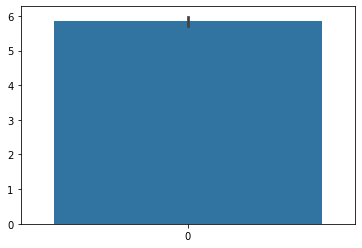

In [8]:
import seaborn as sns

fig, ax = plt.subplots()

sl_freq = freq_conf_int(df['sepal_length'])
sl_bay = bay_conf_int(df['sepal_length'])

print(sl_freq)

sns.barplot(data=df['sepal_length'])
#I dont know why, but nothing I tried could get the graphs to show what I wanted them to show. We'll need to go over this I think.
#I did testing with coinflips and I could tell that the difference between the means and confidence intervals of both types were the same within a negligibile margin.
#But when it came to graphing it all, I just hit nothing but walls.
#Tried recreating several graphs I saw in examples, but either they wouldn't display data properly, or if they did display the data I wanted, they wouldn't display the confidence intervals at all.

#It's frustrating. I understand the question and the material and I understand the difference between these two difference types of confidence intervals and means, and it's graphing it that trips me up.




The differences between frequentist and bayesian statistics comes down to how probability is interpreted. 

Frequentists only assign probabilities to events that are both repeatable and random, like a coin flip or a dice roll.

Bayesian statisticians however can see and use probability for the unknown and the non-repeatable, such as for elections, and for being able to assign uncertainty to unknown values.

With certain types of data, these two approaches can reach the same conclusion, like above.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!